# Surface area of two intersecting spheres

This will calculate the surface area of two intersecting spheres as probed with a smaller probe of radius `proberadius`. The results from an analytical expression is compared to a numerical scheme (freesasa). For more information, see:

- http://mathworld.wolfram.com/SphericalCap.html
- https://freesasa.github.io/python/classes.html#parameters

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import freesasa # pip install freesasa

In [2]:
proberadius = 1.4 # angstrom
param = freesasa.Parameters()
param.setProbeRadius(proberadius)

def fsasa(R,r,d):
    ''' numerical sasa calculation '''
    return freesasa.calcCoord([0,0,0,d,0,0], [R,r], param).totalArea()
    
def area(R, r, d):
    ''' analytical sasa calculation '''
    R = R + proberadius
    r = r + proberadius
    area = 4*pi*(R*R + r*r) # full volume of both spheres
    if d>=R+r:
        return area
    if r>R:
        R,r = r,R
    if d+r<R:
        return 4*pi*R*R # full vilume of biggest sphere
    
    h1 = (r-R+d)*(r+R-d) / (2*d) # height of spherical caps
    h2 = (R-r+d)*(R+r-d) / (2*d) # comprising intersecting lens
    return area - 2*pi*R*h1 - 2*pi*r*h2

vfsasa = np.vectorize(fsasa)
varea = np.vectorize(area)

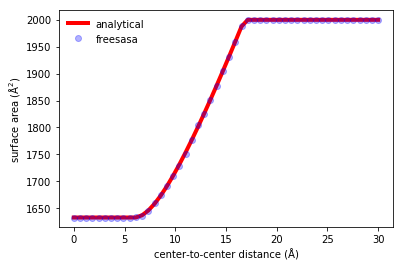

In [17]:
R = 4.0
r = 10
d = np.linspace(0,30,50)


plt.plot( d, varea(R,r,d), 'r-', lw=4, label='analytical')
plt.plot( d, vfsasa(R,r,d), 'bo', alpha=0.3, label='freesasa')
plt.xlabel(r'center-to-center distance (Å)')
plt.ylabel(r'surface area (Å$^2$)')
plt.legend(frameon=False)
